In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv("C:/Users/RayanSoft/bank_loan.csv")

In [3]:
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore,LoanApproved
0,2072-08-01,22,63052,631,Employed,Master,2,18271,12,Married,...,5254.333333,0.639338,3.0,1409,0.167771,0.156702,1654.893043,0.397366,51.0,0
1,2068-04-14,42,62117,522,Employed,Associate,20,29281,108,Divorced,...,5176.416667,0.835783,5.0,106328,0.313281,0.294022,774.117592,0.190888,50.0,0
2,2062-04-07,31,32448,544,Employed,Bachelor,5,33395,60,Divorced,...,2704.000000,0.879069,3.0,8626,0.266395,0.286945,1053.817922,0.531368,54.0,0
3,2031-05-29,19,32182,478,Unemployed,Master,0,49105,24,Single,...,2681.833333,0.868833,7.0,96744,0.285105,0.247245,2614.025710,1.125732,53.0,0
4,2024-04-04,45,77191,646,Employed,Master,21,99655,24,Married,...,6432.583333,0.982722,8.0,16312,0.251655,0.256010,5348.835792,0.924642,52.0,0


In [7]:
df_Loan_Details=df[['LoanAmount','LoanPurpose','MonthlyDebtPayments','LoanDuration']]
df_Loan_Details.head(20)

,LoanAmount,LoanPurpose,MonthlyDebtPayments,LoanDuration
0,18271,Education,433.0,12
1,29281,Auto,214.0,108
2,33395,Debt Consolidation,383.0,60
3,49105,Home,405.0,24
4,99655,Auto,599.0,24
5,19659,Home,248.0,96
6,30742,Home,452.0,48
7,21627,Home,518.0,60
8,29320,Home,525.0,96
9,17255,Home,392.0,84


In [19]:

df['LoanAmount'].head(20)

0     18271
1     29281
2     33395
3     49105
4     99655
5     19659
6     30742
7     21627
8     29320
9     17255
10    23743
11    21514
12    38101
13    21691
14     6896
15    31907
16    18546
17    11664
18    15186
19    16570
Name: LoanAmount, dtype: object

In [20]:
df['LoanAmount'].sample(20)

1049      17426
1964    $19,495
526       15489
1347      22901
2010      22147
1717      30587
118        8782
1933      22815
681       20010
1412      22109
1293      18926
1263      13688
1317       9073
631       45863
1090      11490
573       15152
1732      14605
510        9793
609        9793
1612      25882
Name: LoanAmount, dtype: object

In [21]:
df['LoanAmount'] = (df['LoanAmount'].astype(str).str.replace(r'[^0-9.-]', '', regex=True).replace('', np.nan).astype(float))
df['LoanAmount'].describe()

count      2050.000000
mean      25384.609756
std       14328.906869
min        4188.000000
25%       16100.000000
50%       22112.500000
75%       30876.250000
max      158686.000000
Name: LoanAmount, dtype: float64

# plot functions:

In [ ]:
def plot_numeric_distribution(df, column):
    
    # histogram, KDE, boxplot for a numeric column.
    fig, axes = plt.subplots(2, 1, figsize=(10, 6), 
                             gridspec_kw={'height_ratios': [3, 1]})
    
    # Histogram + KDE
    sns.histplot(df[column].dropna(), bins=30, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    
    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1], color='lightgreen')
    axes[1].set_xlabel(column)
    
    plt.tight_layout()
    plt.show()
def analyze_binary_column(df, column):
    counts = df[column].value_counts().sort_index()
    total = len(df[column])
    percents = (counts / total * 100).round(2)

    plt.figure(figsize=(6,4))
    sns.barplot(x=counts.index, y=counts.values, palette='Paired')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
    
    summary_df = pd.DataFrame({
        'Count': counts,
        'Percentage': percents
    })
    print("Summary statistics:")
    print(summary_df)
    
    most_value = counts.idxmax()
    most_percent = percents[most_value]
    least_value = counts.idxmin()
    least_percent = percents[least_value]

# EDA - Univariate :

 # LoanAmount :

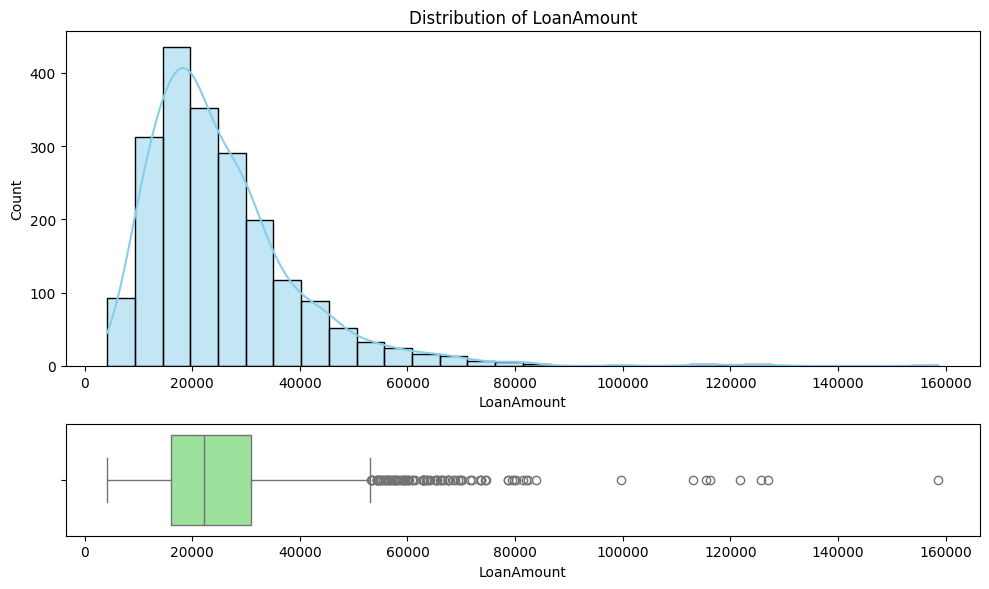

count      2050.000000
mean      25384.609756
std       14328.906869
min        4188.000000
25%       16100.000000
50%       22112.500000
75%       30876.250000
max      158686.000000
Name: LoanAmount, dtype: float64

In [23]:
plot_numeric_distribution(df, 'LoanAmount')
df['LoanAmount'].describe()

Distribution: right-skewed

The approximate loan amount applicants is between 10,000 and 30,000.

Median is around 25385.000.

We have approximately 35% outliers, with values ranging from 55,000 to 85,000.

# LoanDuration :

C:\Users\RayanSoft\AppData\Local\Temp\ipykernel_11660\3851314117.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Paired')


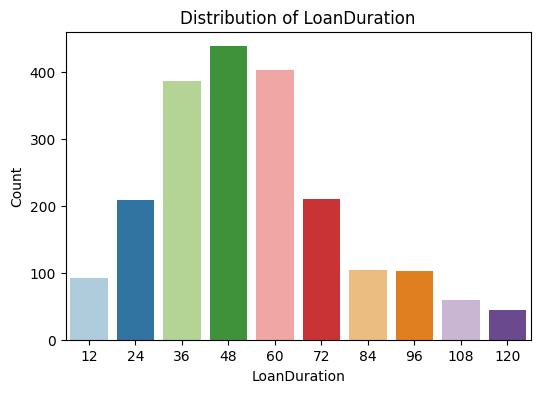

Summary statistics:
              Count  Percentage
LoanDuration                   
12               92        4.49
24              209       10.20
36              387       18.88
48              438       21.37
60              402       19.61
72              210       10.24
84              104        5.07
96              103        5.02
108              60        2.93
120              45        2.20


In [31]:
analyze_binary_column(df,'LoanDuration')

the most Loan Duration is 48 months.and it is 21%.

result : the maximum Loan Duration is 36,48and 60 months.

# LoanPurpose :

C:\Users\RayanSoft\AppData\Local\Temp\ipykernel_11660\2930126417.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Paired')


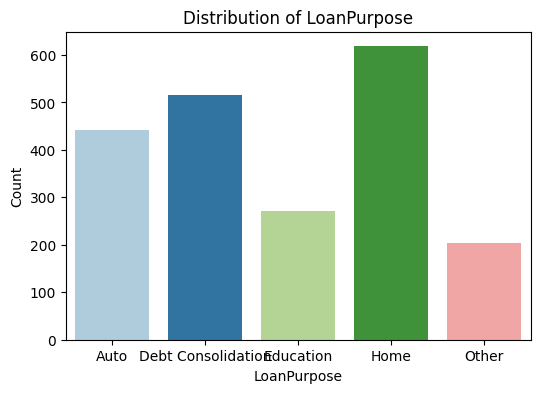

Summary statistics:
                    Count  Percentage
LoanPurpose                          
Auto                  441       21.51
Debt Consolidation    515       25.12
Education             272       13.27
Home                  618       30.15
Other                 204        9.95


In [33]:
analyze_binary_column(df, 'LoanPurpose')

most LoanPurpose was for Home and then Debt Consolidation and Auto the next ones are.


Because it has been mostly used for home, so we can offer more suggestions at home.

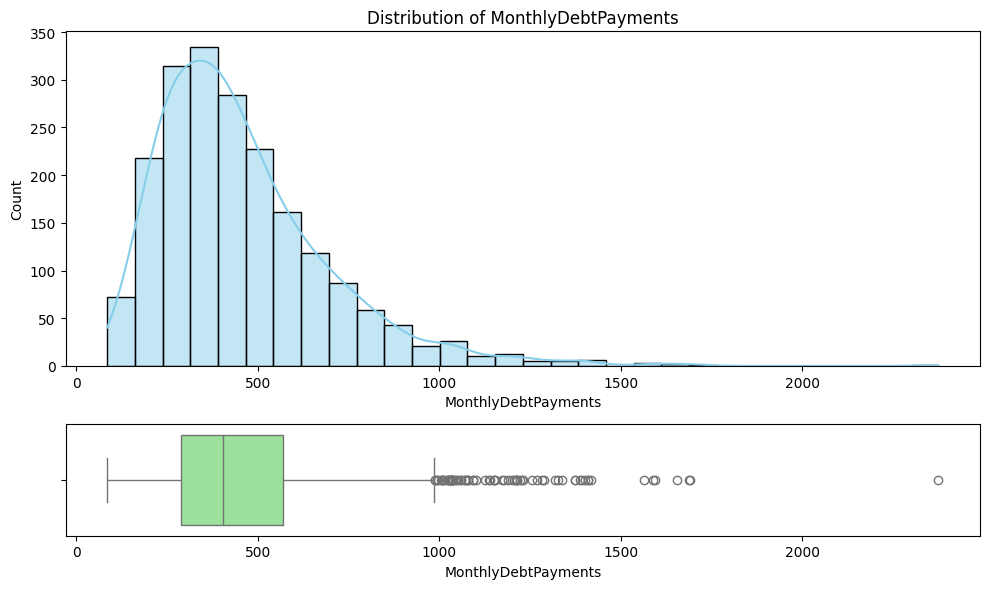

count    2009.000000
mean      457.295669
std       239.521001
min        85.000000
25%       289.000000
50%       405.000000
75%       568.000000
max      2375.000000
Name: MonthlyDebtPayments, dtype: float64

In [28]:
plot_numeric_distribution(df, 'MonthlyDebtPayments')
df['MonthlyDebtPayments'].describe()

median is about 457.000

Outliers are in the range 1000 to 1500.

Total starts from 85,000 to 2,375,000